In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 1. LOAD DATA

In [32]:
df = pd.read_csv('/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3306.0,2.010000e+03,5.478054e+00,2001.000000,2005.000000,2.010000e+03,2.015000e+03,2.019000e+03
Life Expectancy World Bank,3118.0,6.974836e+01,9.408154e+00,40.369000,63.642000,7.216850e+01,7.680900e+01,8.435634e+01
Prevelance of Undernourishment,2622.0,1.066365e+01,1.128590e+01,2.500000,2.500000,6.200000e+00,1.477500e+01,7.090000e+01
CO2,3154.0,1.574924e+05,7.726415e+05,10.000000,2002.499998,1.020500e+04,5.877250e+04,1.070722e+07
Health Expenditure %,3126.0,6.364059e+00,2.842844e+00,1.263576,4.205443,5.892352e+00,8.119166e+00,2.423068e+01
Education Expenditure %,2216.0,4.589014e+00,2.119165e+00,0.850320,3.136118,4.371465e+00,5.519825e+00,2.327000e+01
Unemployment,3002.0,7.890760e+00,6.270832e+00,0.100000,3.733000,5.920000e+00,1.009750e+01,3.725000e+01
Corruption,975.0,2.860513e+00,6.213433e-01,1.000000,2.500000,3.000000e+00,3.250000e+00,4.500000e+00
Sanitation,2059.0,5.273878e+01,3.012676e+01,2.377647,24.746007,4.931748e+01,8.027885e+01,1.000000e+02
Injuries,3306.0,1.318219e+06,5.214068e+06,430.490000,62456.877500,2.456910e+05,8.465591e+05,5.563676e+07


In [85]:
df.dtypes

Country Name                       object
Country Code                       object
Region                             object
IncomeGroup                        object
Year                                int64
Life Expectancy World Bank        float64
Prevelance of Undernourishment    float64
CO2                               float64
Health Expenditure %              float64
Education Expenditure %           float64
Unemployment                      float64
Corruption                        float64
Sanitation                        float64
Injuries                          float64
Communicable                      float64
NonCommunicable                   float64
dtype: object

# 2. CLEANSING DATA

In [35]:
df.isna().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

Try 3 imputation strategies (Median, Group-wise Median, Interpolation).

Compare distributions (histograms/boxplots) and correlations to see which one preserves the structure of your data better.

In [36]:
missing_prop = df.isna().mean() * 100
missing_prop

Country Name                       0.000000
Country Code                       0.000000
Region                             0.000000
IncomeGroup                        0.000000
Year                               0.000000
Life Expectancy World Bank         5.686630
Prevelance of Undernourishment    20.689655
CO2                                4.597701
Health Expenditure %               5.444646
Education Expenditure %           32.970357
Unemployment                       9.195402
Corruption                        70.508167
Sanitation                        37.719298
Injuries                           0.000000
Communicable                       0.000000
NonCommunicable                    0.000000
dtype: float64

This time we will drop variable with > 50% missing data = corruption


In [55]:
df1=df.drop(columns=['Corruption'])
df1.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,144678.14,65271.91,481740.70


| Column                             | Missing % | Cleansing                                                                                 | Why                                                                                                                                                           |
| ---------------------------------- | --------- | ---------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Life Expectancy World Bank**     | \~5.7%    | **linear interpolation by country-year (for time series plots)** | It’s **target variable**.  For visualization (global trends), interpolation makes plots continuous. |
| **Prevalence of Undernourishment** | \~20.7%   | **Group-based median by Region/IncomeGroup + missing indicator**                               | Medium missingness. Likely correlated with income & region. Median by group reduces bias. Keep a `_missing` flag to test robustness.                          |
| **CO₂**                            | \~4.6%    | **Country-year interpolation (linear), fallback to Region median**                             | Time-series variable, smooth over years. Interpolation works best.                                                                                            |
| **Health Expenditure %**           | \~5.4%    | **Country-year interpolation (linear), fallback to IncomeGroup median**                        | Small missingness, smooth over time.                                                                                                                          |
| **Education Expenditure %**        | \~33%     | **High missingness → Region-year median imputation + missing indicator column**                | Too much missingness for fancy methods to be reliable. Keep `_missing` flag.                                                                                  |
| **Unemployment**                   | \~9.2%    | **Iterative imputer (MICE) or KNN**, fallback median by region                                 | Small enough to handle via model-based methods.                                                                                                               |
| **Sanitation**                     | \~38%     | **Region-year median imputation + missing indicator column**                                   | High missingness, so don’t overtrust.                                                                                                                         |


For columns that have <10% missing data (Life Expectancy World Bank, CO₂, Health Expenditure%, Unemployment) we'll use interpolation by country-year, meanwhile columsn with large portion of missing data >10% will be filling up by median by region-year.

In [56]:
df1 = df1.sort_values(['Country Name','Year'])
df1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809,NaN,2179727.10,9689193.70,5795426.38
174,Afghanistan,AFG,South Asia,Low income,2002,56.784,45.6,1029.999971,9.443390,NaN,11.257,NaN,1946983.65,9858324.98,5871595.71
348,Afghanistan,AFG,South Asia,Low income,2003,57.271,40.6,1220.000029,8.941258,NaN,11.141,NaN,1992263.52,9157600.44,6166298.79
522,Afghanistan,AFG,South Asia,Low income,2004,57.772,38.0,1029.999971,9.808474,NaN,10.988,NaN,2050765.02,8791000.56,6315336.43
696,Afghanistan,AFG,South Asia,Low income,2005,58.290,36.1,1549.999952,9.948290,2.57000,11.217,NaN,2157481.76,8555405.22,6353575.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2015,59.534,NaN,12430.000305,7.452066,5.81279,4.778,27.175842,558777.68,4914787.34,2183134.86
2783,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2016,60.294,NaN,11020.000458,7.675163,5.47262,4.788,26.877909,576934.87,4705251.43,2231062.45
2957,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2017,60.812,NaN,10340.000153,7.469752,5.81878,4.785,26.576824,602042.89,4521261.68,2272515.94
3131,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,61.195,NaN,12380.000114,8.680062,3.86611,4.796,26.272073,595808.24,4303993.57,2314452.55


In [57]:
# Columns to interpolate
cols_interp = [
    "Life Expectancy World Bank",
    "CO2",
    "Health Expenditure %",
    "Unemployment"
]



In [58]:
# Apply interpolation per country across years
for col in cols_interp:
    df1[col] = df1.groupby("Country Name")[col].transform(
        lambda x: x.interpolate(method="linear", limit_direction="both")
    )

In [59]:
df1[cols_interp].isna().sum()


Life Expectancy World Bank    152
CO2                           152
Health Expenditure %          133
Unemployment                  304
dtype: int64

linear interpolation can’t always fill all missing values.
For example:


* If a whole country’s variable is missing for all years → nothing to interpolate.
* If the very first or very last values are missing, sometimes interpolation still leaves them out.


In [60]:
# Then fill remaining missing values with Region-Year median
for col in cols_interp:
    df1[col] = df1.groupby(["Region", "Year"])[col].transform(
        lambda x: x.fillna(x.median())
    )

In [61]:
df1[cols_interp].isna().sum()

Life Expectancy World Bank    0
CO2                           0
Health Expenditure %          0
Unemployment                  0
dtype: int64

In [62]:
# we'll do the same(median regio-year imputation) with columns which have >10$ missing data
cols_region_median = [
    "Prevelance of Undernourishment",
    "Education Expenditure %",
    "Sanitation"
]
for col in cols_region_median:
    df1[col] = df1.groupby(["Region", "Year"])[col].transform(
        lambda x: x.fillna(x.median())
    )
    df1[col] = df1[col].fillna(df1[col].median()) 

In [63]:
df1.isna().sum()

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

# 3. DISTRIBUTION VISUALIZATION

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


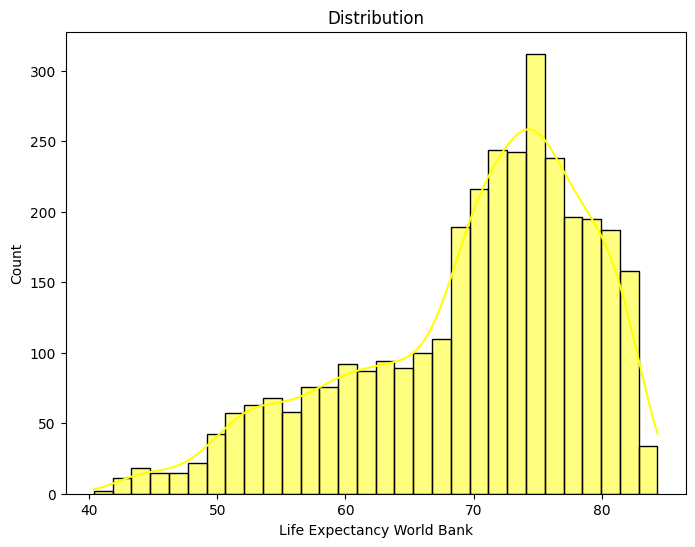

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


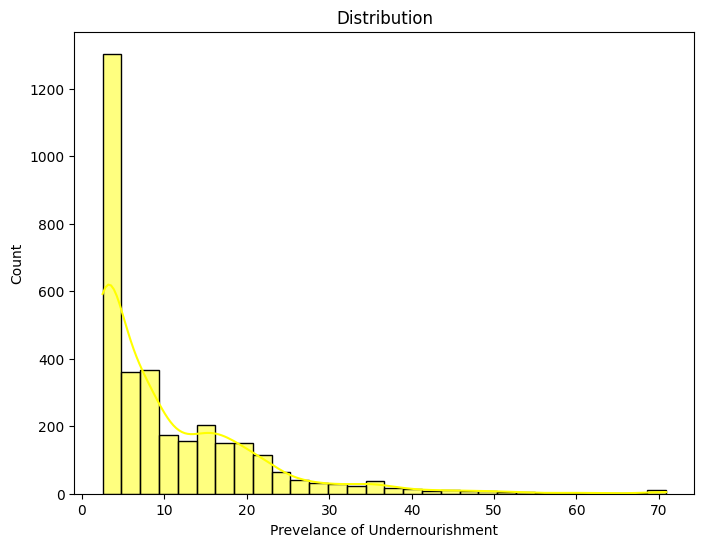

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


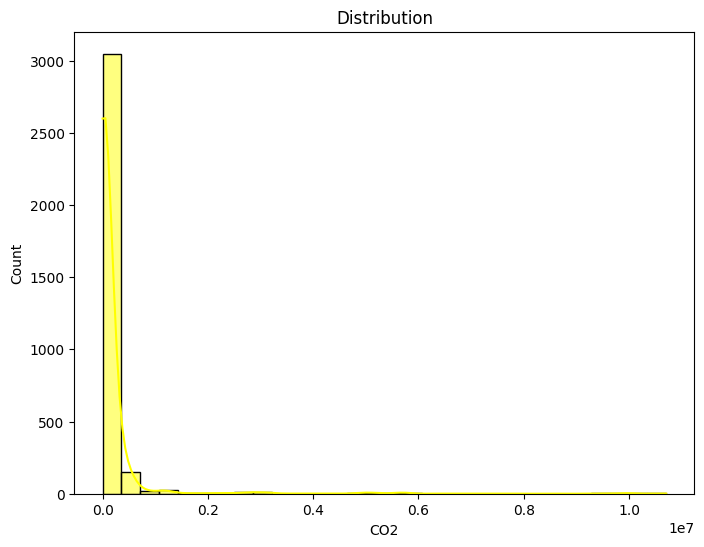

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


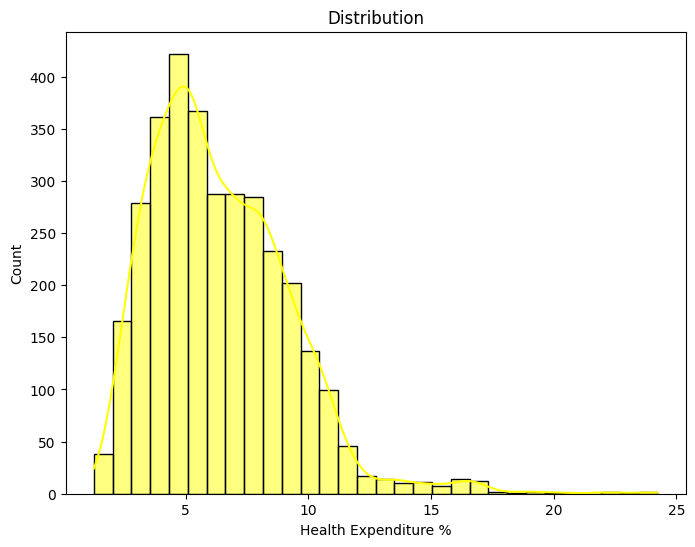

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


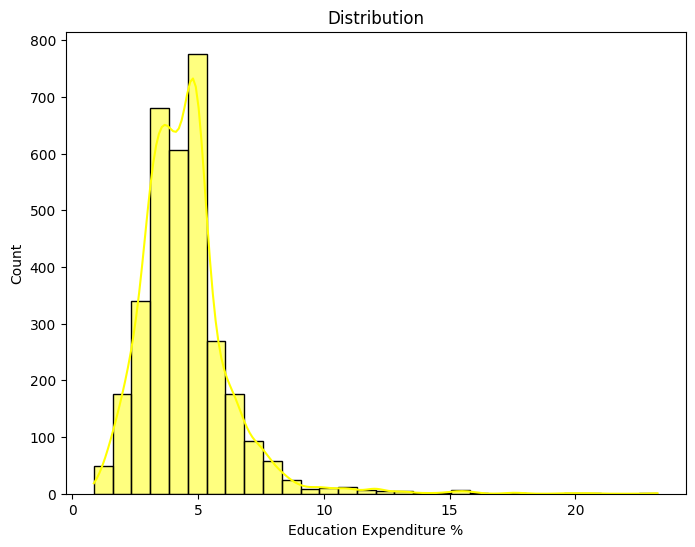

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


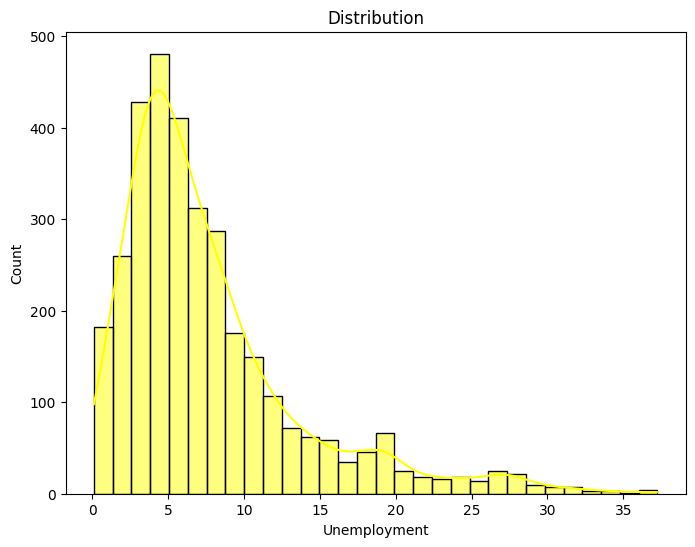

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


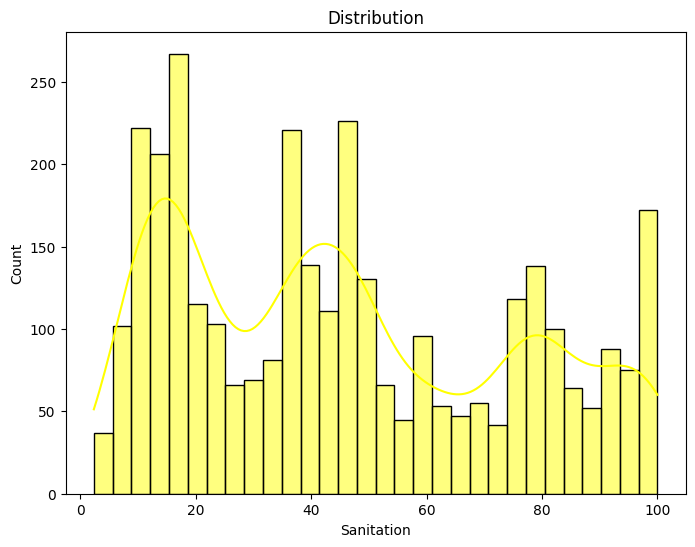

In [66]:
#we will see the distribution of some variables 
variables=[
    'Life Expectancy World Bank',
    'Prevelance of Undernourishment',
    'CO2',
    'Health Expenditure %',
    'Education Expenditure %',
    'Unemployment',
    'Sanitation'
]

for col in variables:
    plt.figure(figsize=(8,6))
    sns.histplot(
        data=df1,
        x=col,
        bins=30,
        kde=True,
        color="yellow",
        edgecolor="black"
        
    )
    plt.title("Distribution")
    plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

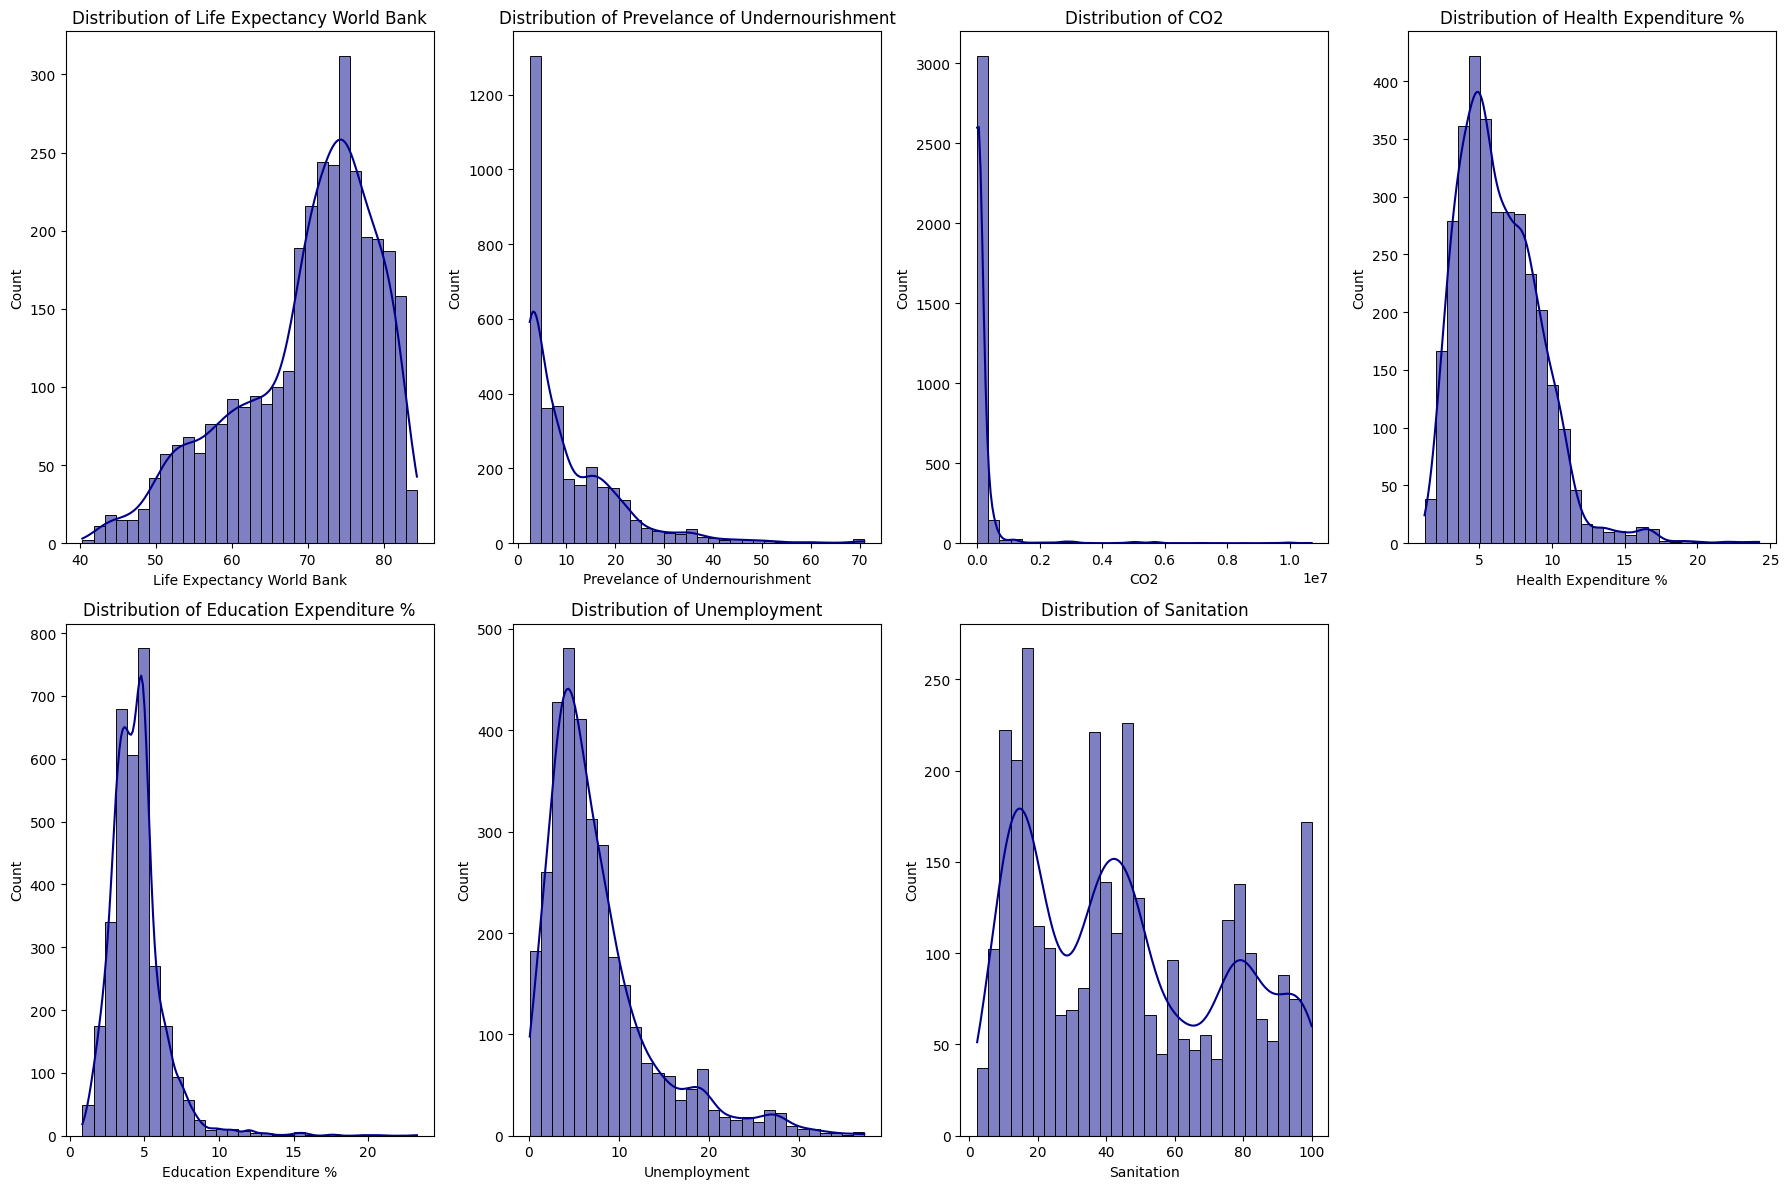

In [79]:
variables = [
    'Life Expectancy World Bank',
    'Prevelance of Undernourishment',
    'CO2',
    'Health Expenditure %',
    'Education Expenditure %',
    'Unemployment',
    'Sanitation'
]

plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, 1):   # use var for the loop variable
    plt.subplot(2, 4, i)
    sns.histplot(
        df1[var], 
        bins=30, 
        kde=True, 
        color="darkblue", 
        edgecolor="black"
    )
    plt.title(f"Distribution of {var}", fontsize=12)

plt.tight_layout()
plt.show()



* Life Expectancy: Skewed to the left (the tail), indicating that the majority of countries already have moderate to high life expectancy, although a few countries have very low values.
* Prevalence of Undernourishment: Skewed to the right, indicating that most countries have very low levels of undernourishment, but some still experience very high cases.
* CO₂ Emissions: The distribution is skewed to the right with outliers, meaning a few countries have significantly higher levels of CO₂ emissions compared to the majority.
* Health Expenditure: The tail stretches to the right, showing that most countries spend a low to moderate budget (below 15%) on health, while a few (developed countries) spend a moderate to high share.
* Education Expenditure: Similar to health, the distribution is skewed to the right, indicating that most countries spend a low to moderate share on education compared to others.
* Unemployment: Some countries experience a high unemployment rate, while the majority have low to moderate rates.
* Sanitation: The distribution is multimodal, indicating that groups of countries fall into different levels of sanitation access.


# 4. SAFE THE DATA

I will safe the data to make visualization and dashboard using Tableau

In [83]:
df1.to_csv("CLEANED_SOCIO_ECONOMIC_WORLD_BANK_DATA.csv", sep="\t", index=False)

In [86]:
# Save clean data to Excel format for Tableau
df1.to_excel(
    "CLEANED_SOCIO_ECONOMIC_WORLD_BANK_DATA_fortableau.xlsx",
    index=False,     # Don’t save the DataFrame index
    engine="openpyxl"  # Use openpyxl for .xlsx
)
